# Finance 601 - Two Python Exercises

## Exercise 1: The 1/N Investment Strategy
Objective: To investigate how the volatility of returns of equally-weighted equity portfolios
 varies with the number of included stocks.
 
Since my ID's XYZ is 928, which is odd,even,even, I'm assigned to case 5: RCI-B,DOL,L,SU,RY,CNR,CSU,NTR,EMA

RCI-B: ROGERS COMMUNICATIONS INC (RCI-B.TO).

DOL: DOLLARAMA INC (DOL.TO).

L: LOBLAW COMPANIES LTD (L.TO).

SU: SUNCOR ENERGY INC (SU.TO).

RY: ROYAL BANK OF CANADA (RY.TO).

CNR: CANADIAN NATIONAL RAILWAY CO (CNR.TO).

CSU: CONSTELLATION SOFTWARE INC (CSU.TO).

NTR: NUTRIEN LTD (NTR.TO).

EMA: EMERA INCORPORATED (EMA.TO).


In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set the start and end dates
start_date = '2019-08-30' 
end_date = '2024-08-31'

stocks = ['RCI-B.TO', 'DOL.TO', 'L.TO', 'SU.TO', 'RY.TO', 'CNR.TO', 'CSU.TO', 'NTR.TO', 'EMA.TO']

### Case 1: Sort the stocks by their ticker alphabetically

In [3]:
# First lets sort the stocks by their ticker alphabetically and create a new list
sorted_ascending = sorted(stocks)
print(sorted_ascending)

['CNR.TO', 'CSU.TO', 'DOL.TO', 'EMA.TO', 'L.TO', 'NTR.TO', 'RCI-B.TO', 'RY.TO', 'SU.TO']


In [4]:
# Fetching the data for the 9 stocks, with the close price and date, and store each of them in a pandas dataframe
data_ascending = pd.DataFrame()
for stock in sorted_ascending:
    history = yf.Ticker(stock).history(start=start_date, end=end_date, auto_adjust=False)
    #show history columns
    data_ascending[stock + '_Close'] = history['Close']
    data_ascending[stock + '_Dividends'] = history['Dividends']
#show the first 5 rows of the data in the dataframes
    print(history['Close'])

Date
2019-08-30 00:00:00-04:00    122.599998
2019-09-03 00:00:00-04:00    121.339996
2019-09-04 00:00:00-04:00    121.199997
2019-09-05 00:00:00-04:00    124.040001
2019-09-06 00:00:00-04:00    122.389999
                                ...    
2024-08-26 00:00:00-04:00    159.250000
2024-08-27 00:00:00-04:00    158.889999
2024-08-28 00:00:00-04:00    158.039993
2024-08-29 00:00:00-04:00    157.779999
2024-08-30 00:00:00-04:00    158.789993
Name: Close, Length: 1256, dtype: float64
Date
2019-08-30 00:00:00-04:00    1296.709961
2019-09-03 00:00:00-04:00    1284.640015
2019-09-04 00:00:00-04:00    1298.959961
2019-09-05 00:00:00-04:00    1320.030029
2019-09-06 00:00:00-04:00    1303.810059
                                ...     
2024-08-26 00:00:00-04:00    4321.529785
2024-08-27 00:00:00-04:00    4291.729980
2024-08-28 00:00:00-04:00    4265.069824
2024-08-29 00:00:00-04:00    4294.609863
2024-08-30 00:00:00-04:00    4400.689941
Name: Close, Length: 1256, dtype: float64
Date
2019-08-30

In [5]:
# Calculate the monthly returns of the stocks, here should be following the ME (Month End) frequency
monthly_returns = pd.DataFrame()
for stock in sorted_ascending:
    close_col = stock + '_Close'
    div_col = stock + '_Dividends'
    monthly_returns[stock] = (data_ascending[close_col].resample('ME').last() + data_ascending[div_col].resample('ME').sum()) / \
                             data_ascending[close_col].resample('ME').last().shift(1) - 1

monthly_returns = monthly_returns.dropna()
monthly_returns.head()

,CNR.TO,CSU.TO,DOL.TO,EMA.TO,L.TO,NTR.TO,RCI-B.TO,RY.TO,SU.TO
Date,,,,,,,,,
2019-09-30 00:00:00-04:00,-0.025302,0.021409,-0.069087,0.008322,0.039865,-0.006756,-0.013352,0.079233,0.083975
2019-10-31 00:00:00-04:00,-0.009751,-0.016869,-0.064853,-0.051874,-0.069176,-0.045303,-0.039052,-0.001675,-0.062934
2019-11-30 00:00:00-05:00,0.023854,0.091618,0.096592,0.001650,0.019362,-0.004920,0.038865,0.023438,0.057967
2019-12-31 00:00:00-05:00,-0.021574,-0.110937,-0.081498,0.021421,-0.059846,0.000941,0.008693,-0.054999,0.037413
2020-01-31 00:00:00-05:00,0.052779,0.102992,0.011293,0.067808,0.033433,-0.091362,0.027605,0.028029,-0.049577


In [6]:
# Calculate each stock's monthly return standard deviation
monthly_volatility = monthly_returns.std()
# Store the monthly volatility in a dataframe
monthly_volatility = pd.DataFrame(monthly_volatility, columns=['Volatility'])
monthly_volatility

,Volatility
CNR.TO,0.052584
CSU.TO,0.064011
DOL.TO,0.061220
EMA.TO,0.040595
L.TO,0.050900
NTR.TO,0.088056
RCI-B.TO,0.053658
RY.TO,0.053777
SU.TO,0.110256


In [7]:
# First stock standard deviation
one_stock_std_dev = monthly_returns[sorted_ascending[0]].std()

# Two combined stock standard deviation
two_stock_returns = (monthly_returns[sorted_ascending[0]] + monthly_returns[stocks[1]]) / 2
two_stock_std_dev = two_stock_returns.std()

# Check the results
print(f"Single stock (first stock) standard deviation: {one_stock_std_dev}")
print(f"Two-stock portfolio standard deviation: {two_stock_std_dev}")

# Use a loop to calculate the standard deviation of the portfolios start with 1 to 9 stocks
portfolio_std_devs = []  # Store the standard deviations of the portfolios
for n in range(1, len(sorted_ascending) + 1):
    # Calculate the average return of the n stocks
    portfolio_returns = monthly_returns[sorted_ascending[:n]].mean(axis=1)
    # Calculate the standard deviation of the portfolio
    portfolio_std_dev = portfolio_returns.std()
    portfolio_std_devs.append(portfolio_std_dev)
    print(f"{n}-stock portfolio standard deviation: {portfolio_std_dev}")

Single stock (first stock) standard deviation: 0.05258390791386853
Two-stock portfolio standard deviation: 0.04593138474217189
1-stock portfolio standard deviation: 0.05258390791386853
2-stock portfolio standard deviation: 0.049637985400251966
3-stock portfolio standard deviation: 0.046078754640763296
4-stock portfolio standard deviation: 0.04002474364098832
5-stock portfolio standard deviation: 0.0383333125257955
6-stock portfolio standard deviation: 0.038127580841160046
7-stock portfolio standard deviation: 0.037450259252142654
8-stock portfolio standard deviation: 0.03719333650858423
9-stock portfolio standard deviation: 0.03903958764148039


In [8]:
len(portfolio_std_devs)

9

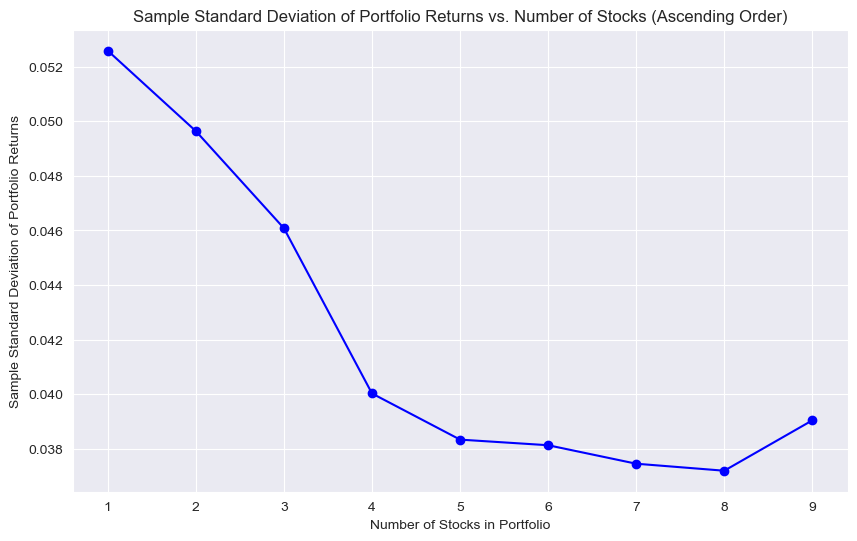

In [9]:
# Plot the results
x = list(range(1, len(stocks) + 1))  # 1 to 9
y = portfolio_std_devs  # Standard deviations of the portfolios

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title("Sample Standard Deviation of Portfolio Returns vs. Number of Stocks (Ascending Order)")
plt.xlabel("Number of Stocks in Portfolio")
plt.ylabel("Sample Standard Deviation of Portfolio Returns")
plt.xticks(x)  # Set the x-axis to display 1 to 9
plt.grid(True)
plt.show()

### Case 2: Sort the stocks alphabetically but in reverse order

In [10]:
stocks.sort(reverse=True)
print(stocks)
#Basically, the same as the previous case, just need to run the same code again
# Fetching the data for the 9 stocks, with the close price and date, and store each of them in a pandas dataframe
data_descending = pd.DataFrame()
for stock in stocks:
    history = yf.Ticker(stock).history(start=start_date, end=end_date, auto_adjust=False)
    data_descending[stock + '_Close'] = history['Close']
    data_descending[stock + '_Dividends'] = history['Dividends']
#show the first 5 rows of the data in the dataframes
data_descending.head()
# Calculate each stock's monthly return standard deviation
monthly_returns = pd.DataFrame()
for stock in stocks:
    close_col = stock + '_Close'
    div_col = stock + '_Dividends'
    monthly_returns[stock] = (data_ascending[close_col].resample('ME').last() + data_ascending[div_col].resample('ME').sum()) / \
                             data_ascending[close_col].resample('ME').last().shift(1) - 1
monthly_volatility = monthly_returns.std()
# Store the monthly volatility in a dataframe
monthly_volatility = pd.DataFrame(monthly_volatility, columns=['Volatility'])
monthly_returns = monthly_returns.dropna()
monthly_returns.head()

['SU.TO', 'RY.TO', 'RCI-B.TO', 'NTR.TO', 'L.TO', 'EMA.TO', 'DOL.TO', 'CSU.TO', 'CNR.TO']


,SU.TO,RY.TO,RCI-B.TO,NTR.TO,L.TO,EMA.TO,DOL.TO,CSU.TO,CNR.TO
Date,,,,,,,,,
2019-09-30 00:00:00-04:00,0.083975,0.079233,-0.013352,-0.006756,0.039865,0.008322,-0.069087,0.021409,-0.025302
2019-10-31 00:00:00-04:00,-0.062934,-0.001675,-0.039052,-0.045303,-0.069176,-0.051874,-0.064853,-0.016869,-0.009751
2019-11-30 00:00:00-05:00,0.057967,0.023438,0.038865,-0.004920,0.019362,0.001650,0.096592,0.091618,0.023854
2019-12-31 00:00:00-05:00,0.037413,-0.054999,0.008693,0.000941,-0.059846,0.021421,-0.081498,-0.110937,-0.021574
2020-01-31 00:00:00-05:00,-0.049577,0.028029,0.027605,-0.091362,0.033433,0.067808,0.011293,0.102992,0.052779


In [11]:
# First stock standard deviation
one_stock_std_dev = monthly_returns[stocks[0]].std()

# Two combined stock standard deviation
two_stock_returns = (monthly_returns[stocks[0]] + monthly_returns[stocks[1]]) / 2
two_stock_std_dev = two_stock_returns.std()

# Check the results
print(f"Single stock (first stock) standard deviation: {one_stock_std_dev}")
print(f"Two-stock portfolio standard deviation: {two_stock_std_dev}")

# Use a loop to calculate the standard deviation of the portfolios start with 1 to 9 stocks
portfolio_std_devs_descending = []  # Store the standard deviations of the portfolios
for n in range(1, len(stocks) + 1):
    # Calculate the average return of the n stocks
    portfolio_returns = monthly_returns[stocks[:n]].mean(axis=1)
    # Calculate the standard deviation of the portfolio
    portfolio_std_dev = portfolio_returns.std()
    portfolio_std_devs_descending.append(portfolio_std_dev)
    print(f"{n}-stock portfolio standard deviation: {portfolio_std_dev}")

Single stock (first stock) standard deviation: 0.11025616637188741
Two-stock portfolio standard deviation: 0.07179335864434472
1-stock portfolio standard deviation: 0.11025616637188741
2-stock portfolio standard deviation: 0.07179335864434472
3-stock portfolio standard deviation: 0.057981026258427
4-stock portfolio standard deviation: 0.05724544362702847
5-stock portfolio standard deviation: 0.04815276679987882
6-stock portfolio standard deviation: 0.043034277856161936
7-stock portfolio standard deviation: 0.04163058288690882
8-stock portfolio standard deviation: 0.04042800469923173
9-stock portfolio standard deviation: 0.03903958764148039


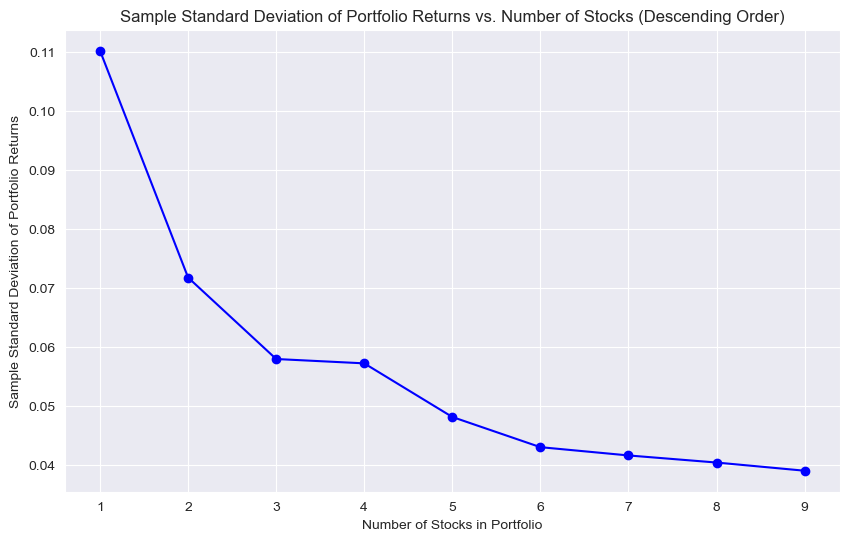

In [12]:
# Plot the results
x = list(range(1, len(stocks) + 1))  # 1 to 9
y = portfolio_std_devs_descending  # Standard deviations of the portfolios in descending order

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title("Sample Standard Deviation of Portfolio Returns vs. Number of Stocks (Descending Order)")
plt.xlabel("Number of Stocks in Portfolio")
plt.ylabel("Sample Standard Deviation of Portfolio Returns")
plt.xticks(x)  # Set the x-axis to display 1 to 9
plt.grid(True)
plt.show()

## Interpretation of the results in Exercise 1

1. The standard deviation of the portfolio returns is a measure of the risk or volatility of the portfolio. From the two plots above, we can see that the standard deviation of the portfolio returns decreases as the number of stocks in the portfolio increases. 

2. This is consistent with the concept of diversification, where adding more stocks to a portfolio can reduce the overall risk of the portfolio.  

3. The first plot shows the standard deviation of the portfolio returns when the stocks are sorted alphabetically, while the second plot shows the standard deviation of the portfolio returns when the stocks are sorted alphabetically but in reverse order. 

4. The results are similar in both cases, indicating that the order of the stocks does not affect the risk reduction achieved by diversification.

## Exercise 2: The Volatility Index V IX

Objective: This exercise is intended to assess whether the well-known volatility index V IX
 provides a better forecast of the daily volatility of the equity market in the month ahead,
 as compared to a more traditional approach that is based on the past volatility of the SPY
 daily returns. (The exchange traded fund SPY tracks the S&P 500 index.)
 
Since my SID's XYZ is 928, I'm assigned to case 1: start from 2020-01-01 and end at:2024-09-01

In [13]:
# Set the start and end dates
start_date = '2020-01-01'
end_date = '2024-09-01'


In [14]:
# Fetch the data for the SPY ETF and the VIX daily close prices into two separate dataframes
spy_data = yf.Ticker("SPY").history(start=start_date, end=end_date, interval="1d", auto_adjust=False)
vix_close = yf.Ticker('^VIX').history( start=start_date, end=end_date, interval="1d", auto_adjust=False)

# Drop NaN values and reset index to get 'Date' column
spy_close = spy_data['Close'].dropna().reset_index()
spy_dividends = spy_data['Dividends'].dropna().reset_index()
vix_close = vix_close['Close'].dropna().reset_index()

# Convert 'Date' column to date format without time
spy_close['Date'] = spy_close['Date'].dt.date
spy_dividends['Date'] = spy_dividends['Date'].dt.date
vix_close['Date'] = vix_close['Date'].dt.date

# Rename 'Close' columns to differentiate between SPY and VIX
spy_close.rename(columns={'Close': 'SPY'}, inplace=True)
vix_close.rename(columns={'Close': 'VIX'}, inplace=True)

# combined_data = pd.concat([spy_close, vix_close], axis=1, keys=['SPY', 'VIX'])
combined_data = pd.merge(vix_close, spy_close, on='Date', how='inner')

#show spy_data
combined_data



,Date,VIX,SPY
0,2020-01-02,12.470000,324.869995
1,2020-01-03,14.020000,322.410004
2,2020-01-06,13.850000,323.640015
3,2020-01-07,13.790000,322.730011
4,2020-01-08,13.450000,324.450012
...,...,...,...
1169,2024-08-26,16.150000,560.789978
1170,2024-08-27,15.430000,561.559998
1171,2024-08-28,17.110001,558.299988
1172,2024-08-29,15.650000,558.349976


In [15]:
# Calculate the daily returns of the SPY ETF including dividends
spy_returns = (spy_close['SPY'] + spy_dividends['Dividends']) / spy_close['SPY'].shift(1) - 1

#Combine the two dataframes into one
combined_data = pd.concat([ vix_close, spy_returns], axis=1)

combined_data.columns = ['Dates','VIX', 'SPY_Returns'] 
combined_data['Dates'] = pd.to_datetime(combined_data['Dates'])
combined_data.set_index('Dates', inplace=True)
combined_data

,VIX,SPY_Returns
Dates,,
2020-01-02,12.470000,NaN
2020-01-03,14.020000,-0.007572
2020-01-06,13.850000,0.003815
2020-01-07,13.790000,-0.002812
2020-01-08,13.450000,0.005330
...,...,...
2024-08-26,16.150000,-0.002384
2024-08-27,15.430000,0.001373
2024-08-28,17.110001,-0.005805


In [18]:
# 确保 'spy_close' 是一个 DataFrame 并包含 'Date' 列
if isinstance(spy_close, pd.DataFrame) and 'Date' in spy_close.columns:
    # 确保 'Date' 列是 datetime 类型
    spy_close['Date'] = pd.to_datetime(spy_close['Date'])
    
    # 将 'Date' 设置为索引
    spy_close.set_index('Date', inplace=True)
    
    # 计算 SPY 的月度标准差
    spy_monthly_returns_STD = spy_close['SPY'].resample('ME').std()
    
    # 输出结果
    print(spy_monthly_returns_STD.head())
else:
    raise ValueError("spy_close must be a DataFrame with a 'Date' column.")


Date
2020-01-31     3.233973
2020-02-29    13.365311
2020-03-31    26.782776
2020-04-30    13.246293
2020-05-31     7.232010
Freq: ME, Name: SPY, dtype: float64


In [ ]:
# Calculate the monthly standard dev of the SPY ETF 
spy_monthly_returns_STD = combined_data['SPY_Returns'].resample('ME').std()
# Calculate the monthly VIX
vix_monthly = combined_data['VIX'].resample('ME').last()

# Combine the monthly VIX and SPY returns into a single dataframe
monthly_data_original = pd.DataFrame({'VIX': vix_monthly,'SPY_Monthly_Returns_STD': spy_monthly_returns_STD})
monthly_data_original

In [ ]:
#remove the dates column
monthly_data_original = monthly_data_original.reset_index(drop=True)
monthly_data_shift_1 = monthly_data_original.copy()
# shift the SPy monthly returns by 1 month
monthly_data_shift_1['SPY_Monthly_Returns_STD'] = monthly_data_shift_1['SPY_Monthly_Returns_STD'].shift(-1)
monthly_data_shift_1

In [ ]:
monthly_data_shift_1.columns = ['Forecast', 'Actual'] 
monthly_data_shift_1

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data_shift_1['Forecast'], monthly_data_shift_1['Actual'], color='g', marker='o')
plt.xlabel('Current VIX (Forecast)')
plt.ylabel('Standard Deviation of Daily Returns (Actual)')
plt.title('Standard Deviation of Daily Returns vs. Current VIX')
plt.grid(True)

# calculate the correlation between the forecast and the actual
correlation_1 = monthly_data_shift_1['Forecast'].corr(monthly_data_shift_1['Actual'])

# Add the correlation coefficient to the plot
plt.text(40, 0.03, f'r1 = {correlation_1:.3f}', color='yellow', fontsize=12)
# add the trendline
sns.regplot(x='Forecast', y='Actual', data=monthly_data_shift_1, color='r', scatter=False)
plt.show()

#show the correlation
print(f"Correlation between the forecast and the actual r1: {correlation_1}")

In [ ]:
# Calculate the correlation between the original SPY monthly STD and the shifted SPY monthly STD.
monthly_data_cp = pd.DataFrame({'Forecast': monthly_data_original['SPY_Monthly_Returns_STD'],'Actual': monthly_data_shift_1['Actual']})
monthly_data_cp

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data_cp['Forecast'], monthly_data_cp['Actual'], color='g', marker='o')
plt.xlabel('Current VIX (Forecast)')
plt.ylabel('Standard Deviation of Daily Returns (Actual)')
plt.title('Standard Deviation of Daily Returns vs. Current VIX')
plt.grid(True)
# calculate the correlation between the forecast and the actual
correlation_2 = monthly_data_cp['Forecast'].corr(monthly_data_cp['Actual'])
# Add the correlation coefficient to the plot
plt.text(0.05,0.05,f'r2 = {correlation_2:.3f}', color='yellow', fontsize=12)
# add the trendline
sns.regplot(x='Forecast', y='Actual', data=monthly_data_cp, color='r', scatter=False)

plt.show()

#show the correlation
print(f"Correlation between the forecast and the actual r2: {correlation_2}")

In [ ]:
# use the Fisher z-Transformation to facilitate the test of statistical significance of the difference between r1 and r2:

r1 = correlation_1  
r2 = correlation_2  
n1 = 56     
n2 = 56     

# Calculate the Fisher Z value
z1 = 0.5 * np.log((1 + r1) / (1 - r1))
z2 = 0.5 * np.log((1 + r2) / (1 - r2))

# calculate the standard error of the z-scores

# Standard error
sigma_1_2 = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))

# calculate the z score difference
Z = (z1 - z2) / sigma_1_2

print("z-score difference:", Z)

For a 95% confidence interval for the standard normal distribution, the critical values of the two tails, each with a 2.5% probability, are abs(1:960). 

Since our result is smaller than this, shows that the difference between the two correlations is not statistically significant at the 5% level.
 
For a 99% con…confidence interval, the critical values of the two tails, each with a 0:5% probability, are abs(2.576) instead.

Since our result is smaller than this, shows that the difference between the two correlations is not statistically significant at the 1% level.
